In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!unzip /content/drive/MyDrive/Dataset/Monuments.v17i.tensorflow.zip -d /content/drive/MyDrive/Dataset

In [ ]:
!pip install tensorflow scikit-learn

In [ ]:
# Import necessary libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

train_dir = '/content/drive/MyDrive/NewDataset/train'
test_dir = '/content/drive/MyDrive/NewDataset/test'


In [ ]:
# Set up ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values to [0, 1]
    rotation_range=20,  # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by up to 20% of the width
    height_shift_range=0.2,  # Randomly shift images vertically by up to 20% of the height
    shear_range=0.2,  # Shear transformations
    zoom_range=0.2,  # Randomly zoom images by up to 20%
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Strategy for filling in newly created pixels
)

# Set up ImageDataGenerator for testing data (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Define batch size
batch_size = 32

# Set up flow_from_directory to load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,  # Path to the training directory
    target_size=(224, 224),  # Resize images to (224, 224)
    batch_size=batch_size,
    class_mode='categorical'  # Use categorical labels for multiclass classification
)

test_generator = test_datagen.flow_from_directory(
    test_dir,  # Path to the testing directory
    target_size=(224, 224),  # Resize images to (224, 224)
    batch_size=batch_size,
    class_mode='categorical'  # Use categorical labels for multiclass classification
)


Found 3676 images belonging to 24 classes.
Found 1049 images belonging to 24 classes.


In [ ]:
# Count the number of subdirectories (classes) in the training directory
num_classes = len(os.listdir(train_dir))

# Define the architecture of your deep learning model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Adjust num_classes to match your dataset
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=1,  # Adjust the number of epochs as needed
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)


114/114 [==============================] - 1791s 16s/step - loss: 2.9942 - accuracy: 0.1196 - val_loss: 3.0595 - val_accuracy: 0.0996


In [ ]:
# Evaluate the model on the testing data
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print("Test Accuracy:", accuracy)


32/32 [==============================] - 52s 1s/step - loss: 3.0626 - accuracy: 0.0996
Test Accuracy: 0.099609375


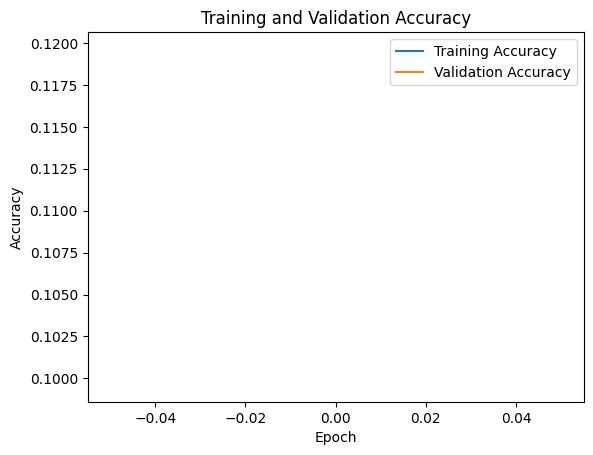

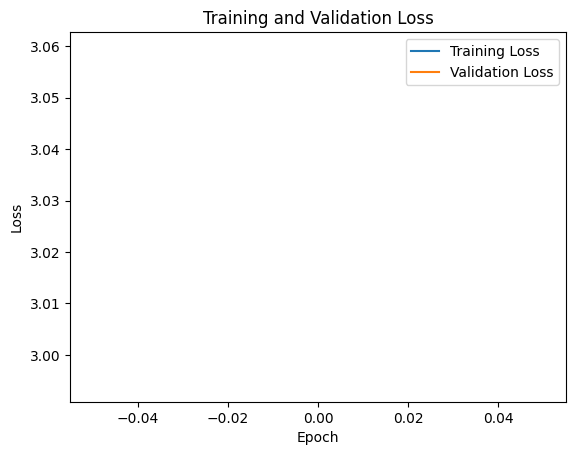

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Make predictions on the testing data
predictions = model.predict(test_generator)

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels from the generator
true_labels = test_generator.classes

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Calculate accuracy score
accuracy = accuracy_score(true_labels, predicted_labels)


33/33 [==============================] - 51s 1s/step


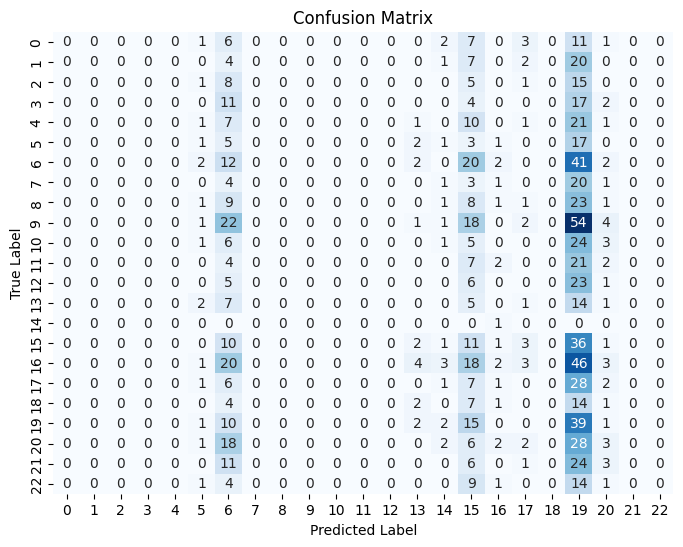

In [ ]:
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
print("Accuracy:", accuracy)

Accuracy: 0.06482364156339371
